假设函数 y = sin2paix，加上一个正态分布的噪音干扰，用多项式去拟合

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0

In [5]:
#目标函数
def real_func(x):
    return np.sin(2*np.pi*x)
#生成多项式
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)
#残差，要使残差越来越小
def residuals_func(p,x,y):
    ret = fit_func(p,x)-y
    return ret

In [6]:
#十个点点
x =np.linspace(0,1,10)
x_points = np.linspace(0,1,1000)
#加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0,0.1)+y1 for y1 in y_] #np.random.normal:从正态(高斯)分布中抽取随机样本

In [10]:
def fitting(M=0):
    #M:多项式次数
    #随机初始化多项式次数
    p_init = np.random.rand(M+1)
    #最小二乘法
    p_lsp = leastsq(residuals_func, p_init, args=(x,y))
    print('Fitting Parameters:',p_lsp[0])
    
    #可视化
    plt.plot(x_points , real_func(x_points),label = 'real')
    plt.plot(x_points, fit_func(p_lsp[0],x_points),label = 'fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsp

Fitting Parameters: [-0.01320431]


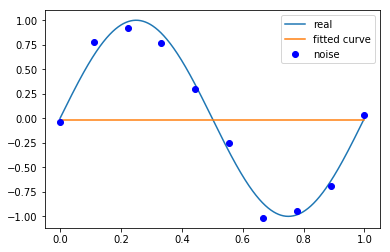

In [11]:
p_lsp_0=fitting(M=0)

Fitting Parameters: [-1.35450169  0.66404654]


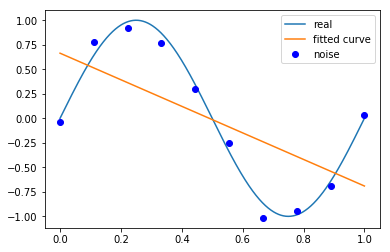

In [12]:
p_lsp_0=fitting(M=1)

Fitting Parameters: [ 21.32545732 -31.77374887  10.56814248  -0.04136132]


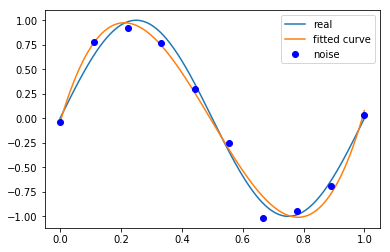

In [13]:
p_lsp_0=fitting(M=3)

Fitting Parameters: [ 2.90538197e+04 -1.27158880e+05  2.33201613e+05 -2.32941089e+05
  1.37850138e+05 -4.91598469e+04  1.02450469e+04 -1.14917470e+03
  5.84453309e+01 -3.61915370e-02]


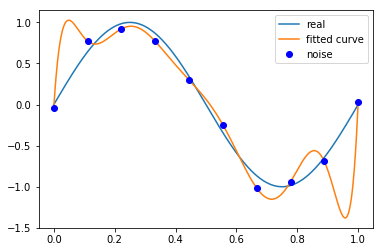

In [14]:
p_lsp_0=fitting(M=9)